<h3> importing packages </h3>

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h3> reading in training data </h3>

In [196]:
df_train = pd.read_csv('/Users/milkarodriguez/Desktop/IOWA/train.csv')


In [197]:
df_train.shape # we have a total of 118260 values

(1460, 81)

<h3> having a look at the first 10 rows of our dataset </h3>

In [198]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


<h3> column names </h3>

In [199]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<h3> Checking the data type of our columns </h3>
<ul> <li>Just in case one of the features that is intended to be numerical has an object data type</li>
<li> BUT SO FAR SO GOOD </li></ul>

In [200]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<h2> The mean Sale Price is approximately $180,921.20 </h2>
<h3> Not bad eh? </h3>

In [201]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<h2> Average Lot Area is approximately 10,516.83 sq ft </h2>

In [202]:
df_train['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

<h2> Distribution : Right skewed</h2>

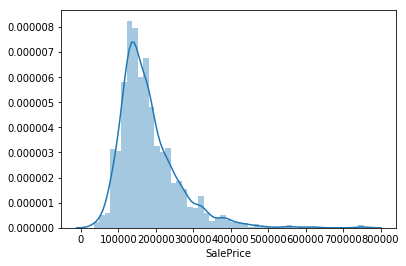

In [203]:
sns.distplot(df_train['SalePrice'])

In [204]:
#print("Skewness: %f" % df_train['SalePrice'].skew())
#print("Kurtosis: %f" % df_train['SalePrice'].kurt())

<h2> OUTLIERS! </h2>

<h3> Notice there are two ouliters where the general living area is significantly large but the sale price is low. </h3>
<h3> We should take them out as it might be causing major skewness in our data</h3>

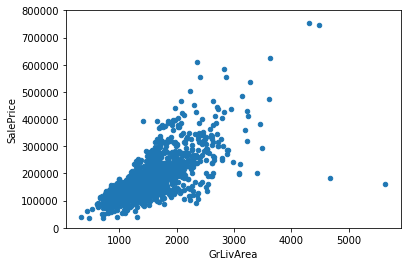

In [205]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<h1> removing the two outliers outliers referenced above</h1>

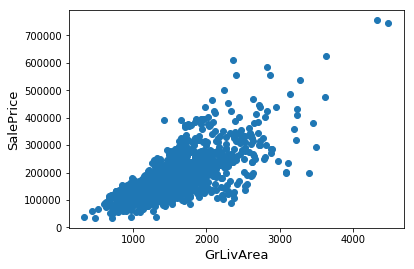

In [206]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

<h3> now that we have removed the outliers, lets check our data again </h3>

<h2> Notice that our Sale Price average is now 180932.92 so it went up by $11.72 </h2>

In [207]:
df_train['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<h3> Correlation of our features with SalesPrice </h3>
<ul><li> Recall that sales price is what we are trying to predict </li>
    <li> For negative correlations think about the LowQualFinSF (the MORE low quality finish, the LESS the sales price)</li>

In [208]:
df_train[df_train.columns[1:]].corr()['SalePrice'][:]

MSSubClass      -0.084276
LotFrontage      0.370584
LotArea          0.268179
OverallQual      0.795774
OverallCond     -0.077948
YearBuilt        0.523608
YearRemodAdd     0.507717
MasVnrArea       0.482719
BsmtFinSF1       0.409384
BsmtFinSF2      -0.011422
BsmtUnfSF        0.214460
TotalBsmtSF      0.651153
1stFlrSF         0.631530
2ndFlrSF         0.320532
LowQualFinSF    -0.025625
GrLivArea        0.734968
BsmtFullBath     0.228459
BsmtHalfBath    -0.016881
FullBath         0.562165
HalfBath         0.284590
BedroomAbvGr     0.168245
KitchenAbvGr    -0.135946
TotRmsAbvGrd     0.537769
Fireplaces       0.469862
GarageYrBlt      0.487156
GarageCars       0.641047
GarageArea       0.629217
WoodDeckSF       0.324758
OpenPorchSF      0.321142
EnclosedPorch   -0.128646
3SsnPorch        0.044568
ScreenPorch      0.111415
PoolArea         0.099490
MiscVal         -0.021203
MoSold           0.046124
YrSold          -0.028882
SalePrice        1.000000
Name: SalePrice, dtype: float64

<h1> Percentage of missing values table (s) </h1>

In [209]:
#first way of doing it
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [210]:
missing_values_table(df_train)

#since salesprice is skewed data, we will have to take the log of it 
#also we might have to dummify the categorical variables 

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1452,99.6
MiscFeature,1404,96.3
Alley,1367,93.8
Fence,1177,80.7
FireplaceQu,690,47.3
LotFrontage,259,17.8
GarageType,81,5.6
GarageYrBlt,81,5.6
GarageFinish,81,5.6
GarageQual,81,5.6


<h1> another table just including percentages of missing values </h1>

In [211]:
#second way of doing it
df_train_na = (df_train.isnull().sum() / len(df_train)) * 100
df_train_na = df_train_na.drop(df_train_na[df_train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_train_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.588477
MiscFeature,96.296296
Alley,93.758573
Fence,80.727023
FireplaceQu,47.325103
LotFrontage,17.764060
GarageYrBlt,5.555556
GarageType,5.555556
GarageFinish,5.555556
GarageQual,5.555556


Text(0.5, 1.0, 'Percent missing data by feature')

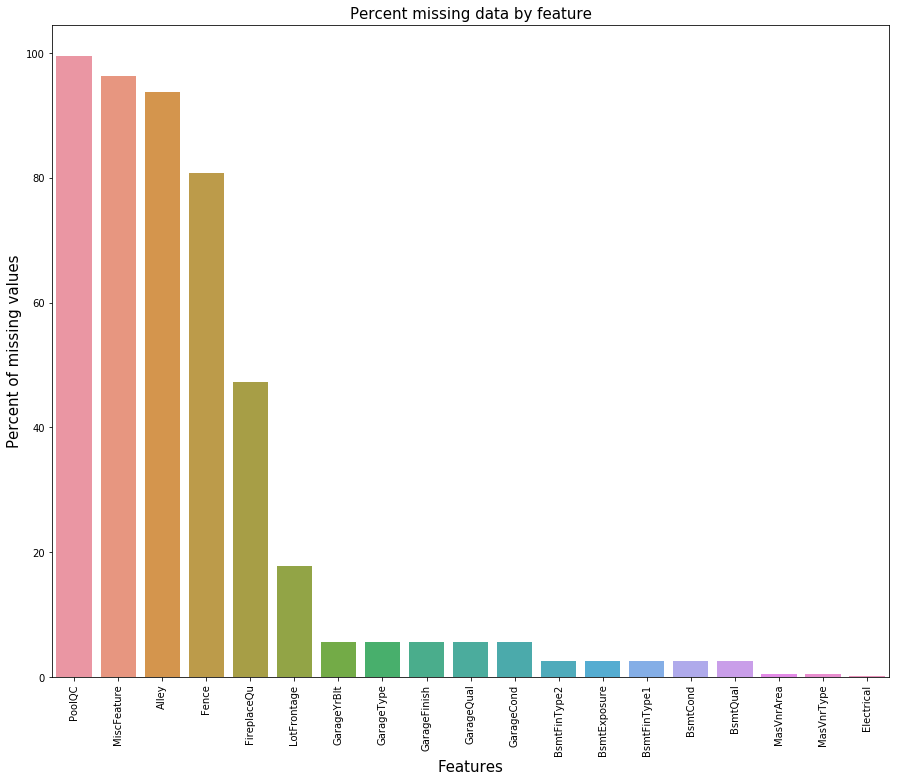

In [212]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x= df_train_na.index, y= df_train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<h2> Distribution after removing outliers: Still right skewed </h2>

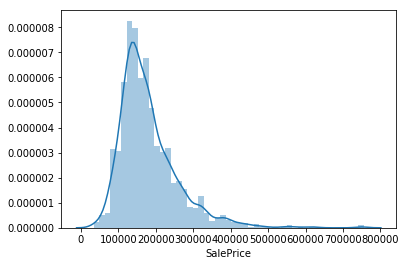

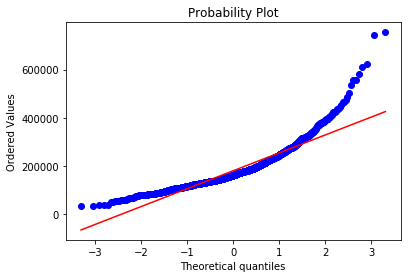

In [213]:
sns.distplot(df_train['SalePrice'])

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


<p>
<h2> log transform the data </h2> </p>
<ol><li>Linear models work best with normally distributed data</li>
    <li> Normalize data</li>
    <li>log transform the target variable</li>
      
</ol>


 mu = 180932.92 and sigma = 79467.79



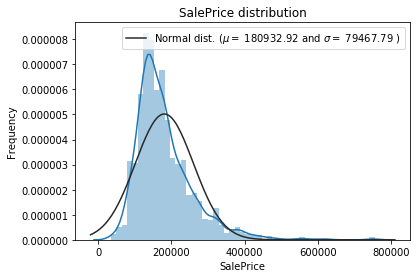

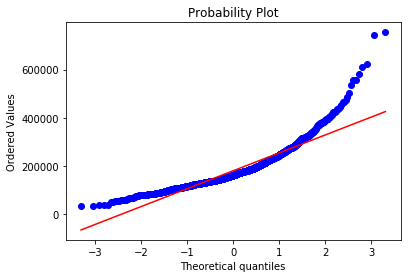

In [214]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
# df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [215]:
df_train['log_SalePrice'] = np.log(df_train['SalePrice'])

<h1> heat map to check multicollinearity </h1>

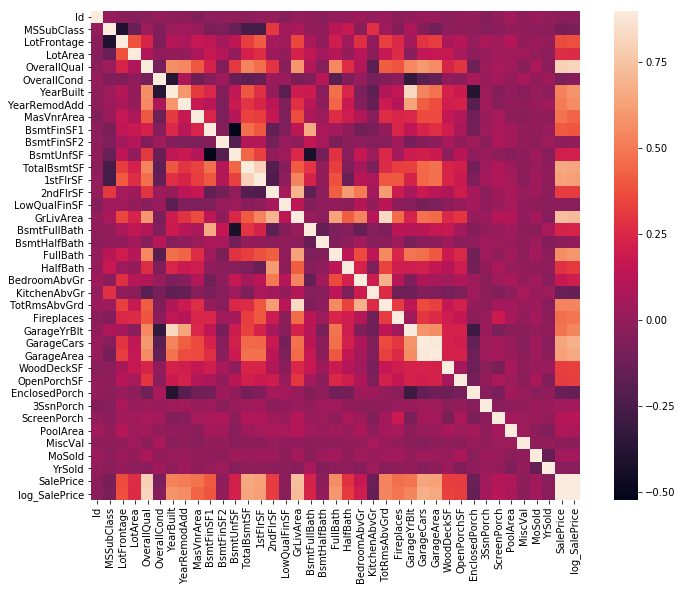

In [216]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

#if you want to create another color pallete this link helps although I tried them, they
#werent as useful as this heatmap
#https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/

<h1> Handling missing data </h1>
<ol>
    <li> Replacing Pool Quality NA's with None</li>
<li> Replacing Alley NA's with None</li>
<li> Replacing MiscFeature NA's with None </li>
<li> Replacing Fence NA's with None</li>
<li> </li>
<li> </li>
<li> </li>
<li> </li>
<li> Replacing Lot Area NA's with median of neighborhood</li></ol>




In [217]:
df_train["PoolQC"] = df_train["PoolQC"].fillna("None")
df_train["Alley"] = df_train["Alley"].fillna("None")
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")
df_train["Fence"] = df_train["Fence"].fillna("None")
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [218]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

In [219]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)

In [220]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)

In [221]:
df_train['MasVnrArea'] = df_train.MasVnrArea.fillna(0)

turning Ordinal Categorical features into numeric type

In [222]:
df_train['ExterQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['ExterCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0})
df_train['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_train['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_train['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['KitchenQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['FireplaceQu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['PoolQC'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'None':0})
df_train['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'None':0})


0       0
1       0
2       0
3       0
4       0
5       3
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      2
15      4
16      0
17      0
18      0
19      3
20      0
21      4
22      0
23      0
24      3
25      0
26      0
27      0
28      0
29      0
       ..
1430    0
1431    0
1432    0
1433    0
1434    0
1435    4
1436    2
1437    0
1438    3
1439    0
1440    0
1441    0
1442    0
1443    0
1444    0
1445    0
1446    0
1447    0
1448    2
1449    0
1450    0
1451    0
1452    0
1453    0
1454    0
1455    0
1456    3
1457    4
1458    0
1459    0
Name: Fence, Length: 1458, dtype: int64

In [224]:
df_train = pd.get_dummies(df_train)

# nominal columns

In [184]:
nominal_columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', \
             'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood','Condition1', \
'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', \
'MasVnrType','Foundation','Heating','CentralAir','Electrical', 'Functional','GarageType', \
'GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition']

df_train = pd.get_dummies(df_train[nominal_columns])

# df_train = pd.get_dummies(df_train[nominal_columns])

use_columns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', \
             'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood','Condition1', \
'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', \
'MasVnrType','Foundation','Heating','CentralAir','Electrical', 'Functional','GarageType', \
'GarageFinish','PavedDrive','MiscFeature','SaleType','SaleCondition','LotFrontage', \
'LotArea', 'YearRemodAdd','MoSold','YrSold','MasVnrArea','BsmtFinSF1','BsmtFinSF2', \
'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath', \
'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','OverallQual', \
'OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', \
'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC', \
'Fence']


# linear modeling 

In [225]:
#from sklearn import linear_model, model_selection
#from sklearn.model_selection import train_test_split

#ols = linear_model.LinearRegression()

#X = df_train.drop(columns=['SalePrice', 'log_SalePrice'], axis = 1)
#y = df_train['log_SalePrice']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#ols.fit(X_train, y_train)

In [226]:
#ols.predict(X_test)

In [227]:
#ols.score(X_test, y_test)

In [228]:
from sklearn import linear_model, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso, RidgeCV, BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error, make_scorer

In [229]:
ols = linear_model.LinearRegression()

In [230]:
X = df_train.drop(columns=['SalePrice', 'log_SalePrice'], axis = 1)

y = df_train['log_SalePrice']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [232]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [267]:
#pred = ols.predict(X_test)
pred = ols.predict(X_train)

In [234]:
# ols.score(X_train, y_train)

In [235]:
# def rmse(targ, pred):
#     return np.sqrt(mean_squared_error(targ, pred))

# # trainRMSE = np.sqrt(mean_squared_error(y_true=y_train, y_pred=ridcv.predict(x_train)))


In [268]:
training_score = np.sqrt(mean_squared_error(y_train, pred))
print(training_score)

0.08558757907779002


In [269]:
test_score = np.sqrt(mean_squared_error(y_test, ols.predict(X_test)))
print(test_score)

0.13020135158399493


##### Ridge

In [286]:
ridge = Ridge()
parameters = {'alpha':np.linspace(15,30,1000)}
ridgegs = ms.GridSearchCV(ridge, parameters, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
ridgegs.fit(X_train, y_train)

trainRMSE = np.sqrt(mean_squared_error(y_true=y_train, y_pred=ridgegs.predict(X_train)))
testRMSE = np.sqrt(mean_squared_error(y_true=y_test, y_pred=ridgegs.predict(X_test)))

ridgegs.best_params_

{'alpha': 26.11111111111111}

In [287]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge, RidgeCV, BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error, make_scorer
import sklearn.model_selection as ms

In [288]:
rcv = RidgeCV()

In [289]:
ridcv = RidgeCV(alphas=[26.11111111111111], normalize=False, scoring=None)

ridcv.fit(X_train,y_train)

trainRMSE = np.sqrt(mean_squared_error(y_true=y_train, y_pred=ridcv.predict(X_train)))
testRMSE = np.sqrt(mean_squared_error(y_true=y_test, y_pred=ridcv.predict(X_test)))

print(trainRMSE)
print(testRMSE)

#20.865865865865867

0.09622485386687717
0.12648767949909323


###### lasso

In [290]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [291]:
lasso = Lasso()
parameters = {'alpha':np.linspace(15,30,1000)}
lassogs = ms.GridSearchCV(lasso, parameters, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
lassogs.fit(X_train, y_train)

trainRMSEl = np.sqrt(mean_squared_error(y_true=y_train, y_pred=lassogs.predict(X_train)))
testRMSEl = np.sqrt(mean_squared_error(y_true=y_test, y_pred=lassogs.predict(X_test)))

lassogs.best_params_


{'alpha': 15.0}

In [385]:
lassocv= LassoCV(alphas= [0.00095])
#trial and error with the alphas

In [386]:
lassocv.fit(X_train, y_train)

LassoCV(alphas=[0.00095], copy_X=True, cv='warn', eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [387]:
trainRMSEl = np.sqrt(mean_squared_error(y_true=y_train, y_pred=lassocv.predict(X_train)))
testRMSEl = np.sqrt(mean_squared_error(y_true=y_test, y_pred=lassocv.predict(X_test)))

In [388]:
print(trainRMSEl)
print(testRMSEl)

0.10066802854128012
0.12534906673707386


###### Elastic-net

In [ ]:
enet = ElasticNetCV(l1_ratio=np.linspace(0.05,1,100), alphas=np.linspace(1e-5,15,1000), max_iter=1000, normalize=False, cv=10, n_jobs=-1)

In [ ]:
enet.fit(X_train, y_train)

##### random forest

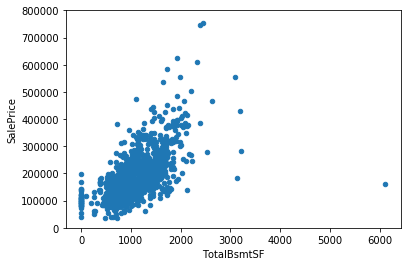

In [12]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0, 800000)

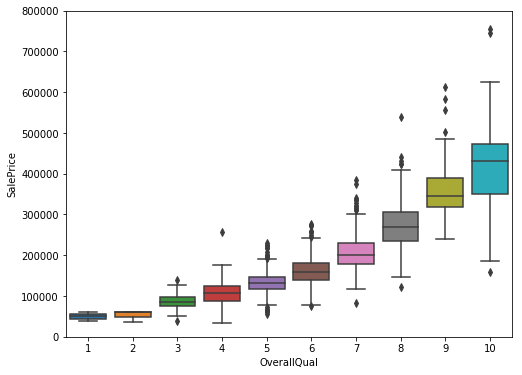

In [13]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)